In [1]:
import pandas as pd
import numpy as np
responses = pd.read_csv('responses_updated.csv')

In [2]:
#clean data just get results for last 2 questions and epsilon
responses['priv1'] = responses['Unnamed: 14']
responses['priv2'] = responses['Unnamed: 15']
responses['prob_epsilon'] = responses['Unnamed: 13']
small_data = responses[["priv1", "priv2", "prob_epsilon"]]

In [3]:
responses

,Unnamed: 0,Normal,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Noisy,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,priv1,priv2,prob_epsilon
0,ID,Question_1,Question_2,Question_3,Question_4,Question_5,Question_1,Question_2,Question_3,Question_4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Question_1,Question_2,Epsilon Value
1,117,yes,no,yes,yes,yes,yes,no,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,51
2,118,no,yes,yes,yes,yes,yes,no,no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,51
3,119,no,no,no,yes,no,no,yes,yes,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,51
4,120,no,yes,no,yes,no,yes,yes,no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,51
5,121,yes,no,yes,yes,no,yes,no,no,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,51
6,122,no,yes,no,yes,no,yes,yes,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,51
7,123,no,yes,no,yes,no,yes,yes,yes,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,60
8,124,no,no,no,no,no,yes,yes,no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,60
9,125,no,yes,no,yes,no,yes,yes,no,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,60


In [4]:
responses['same_prediction'] = responses['Unnamed: 11'] == responses['Unnamed: 12']


In [5]:
responses['first_compare'] = responses['Normal'] == responses['Noisy']
responses['second_compare'] = responses['Unnamed: 2'] == responses['Unnamed: 7']
responses['third_compare'] = responses['Unnamed: 3'] == responses['Unnamed: 8']
responses['fourth_compare'] = responses['Unnamed: 4'] == responses['Unnamed: 9']
responses['fifth_compare'] = responses['Unnamed: 5'] == responses['Unnamed: 10']
same_answers = responses[['first_compare', 'second_compare', 'third_compare', 'fourth_compare', 'fifth_compare']]

In [6]:
same_answers

,first_compare,second_compare,third_compare,fourth_compare,fifth_compare
0,True,True,True,True,True
1,True,True,False,False,False
2,False,False,False,True,False
3,True,False,False,True,True
4,False,True,True,True,False
5,True,True,False,False,False
6,False,True,False,False,True
7,False,True,False,False,True
8,False,False,True,False,False
9,False,True,True,True,True


In [7]:
x = np.zeros(len(same_answers))
for i in range(len(same_answers)):
    if i > 0:
        if (same_answers['first_compare'][i]):
            x[i] += 1
        if (same_answers['second_compare'][i]):
            x[i] += 1
        if (same_answers['third_compare'][i]):
            x[i] += 1
        if (same_answers['fourth_compare'][i]):
            x[i] += 1
        if (same_answers['fifth_compare'][i]):
            x[i] += 1


In [8]:
x

array([0., 2., 1., 3., 3., 2., 2., 2., 1., 4., 2., 4., 2., 4., 4., 5., 5.,
       5., 4., 5., 4., 4., 5., 4., 4., 5., 5., 5., 4., 5., 5., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
import matplotlib.pyplot as plt

In [52]:
def mean_flips(arr):
    s = np.sum(arr)
    return (s/6)

In [68]:
x[13:19]

array([4., 4., 5., 5., 5., 4.])

In [71]:
x[19:25]

array([5., 4., 4., 5., 4., 4.])

In [73]:
mean_flips(x[7:13])

2.5

In [69]:
flips_avgs = [mean_flips(x[1:7]),mean_flips(x[7:13]),mean_flips(x[13:19]),mean_flips(x[19:25]),mean_flips(x[25:31])]

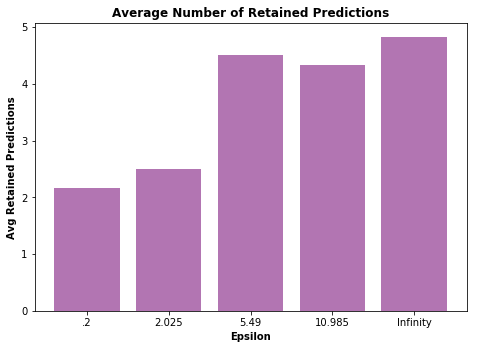

In [70]:
# mean_flips = [1.83,1.83,2.67,4.5,5] #these are the old averages
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
value = flips_avgs
category = epsilons
ax.bar(category,value, color = (0.5,0.1,0.5,0.6))
plt.ylabel('Avg Retained Predictions', fontweight='bold')
plt.xlabel('Epsilon', fontweight='bold')
plt.title('Average Number of Retained Predictions', fontweight='bold')
# plt.hlines(2.5,0,6)
plt.show()

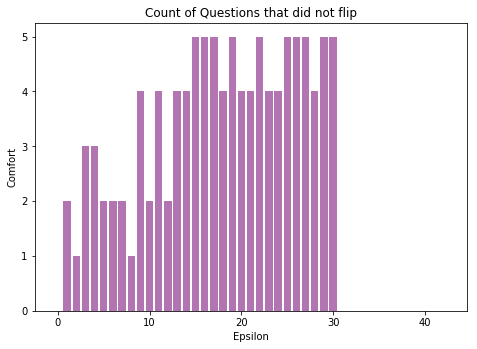

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
value = x
category = np.arange(len(x))
ax.bar(category,value, color = (0.5,0.1,0.5,0.6))
plt.ylabel('Comfort')
plt.xlabel('Epsilon')
plt.title('Count of Questions that did not flip')
plt.show()

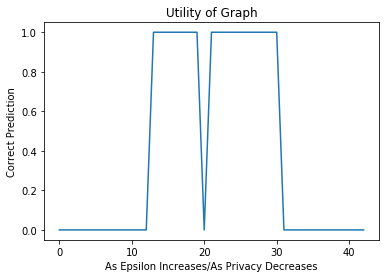

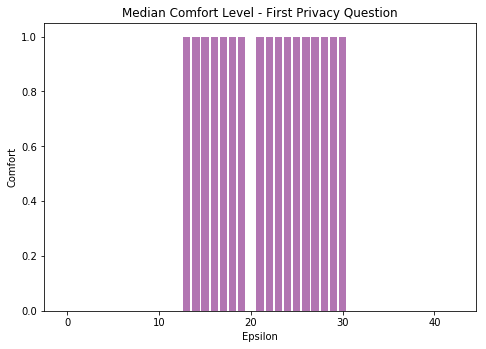

In [46]:
lst_same = responses['same_prediction'].to_list()
for n, i in enumerate(lst_same):
    if i == False: 
        lst_same[n] = 0
    elif i == True:
        lst_same[n] = 1
              
plt.plot(lst_same)
plt.ylabel('Correct Prediction')
plt.xlabel('As Epsilon Increases/As Privacy Decreases')
plt.title('Utility of Graph')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
value = lst_same
category = np.arange(len(lst_same))
ax.bar(category,value, color = (0.5,0.1,0.5,0.6))
plt.ylabel('Comfort')
plt.xlabel('Epsilon')
plt.title('Median Comfort Level - First Privacy Question')
plt.show()

In [13]:
#count the amount of answers for a given epsilon that equal 1,2,3 for both the first and the second question about privacy
def count_answers(df):
    count1_1 = len(df[df['priv1'] == '1'])
    count2_1 = len(df[df['priv1'] == '2'])
    count3_1 = len(df[df['priv1'] == '3'])
    #if it was as sensitive as financial info
    count1_2 = len(df[df['priv2'] == '1'])
    count2_2 = len(df[df['priv2'] == '2'])
    count3_2 = len(df[df['priv2'] == '3'])
    return[[count1_1,count2_1,count3_1],[count1_2,count2_2,count3_2]]

In [14]:
[answ1_51,answ2_51] = count_answers(small_data[small_data['prob_epsilon'] == '51'])
[answ1_60,answ2_60] = count_answers(small_data[small_data['prob_epsilon'] == '60'])
[answ1_75,answ2_75] = count_answers(small_data[small_data['prob_epsilon'] == '75'])
[answ1_90,answ2_90] = count_answers(small_data[small_data['prob_epsilon'] == '90'])
[answ1_100,answ2_100] = count_answers(small_data[small_data['prob_epsilon'] == '100'])

In [15]:
#make some metric to calculate the total level of comfort for epsilon/probability 
#1 - private, 2 - medium, 3 - non private
#maybe first we should calculate the median?
def get_median(arr):
    median = np.argmax(arr) + 1 #add 1 bc its 0 indexed
    return median

In [16]:
epsilons = ['.2', '2.025', '5.49', '10.985','Infinity']

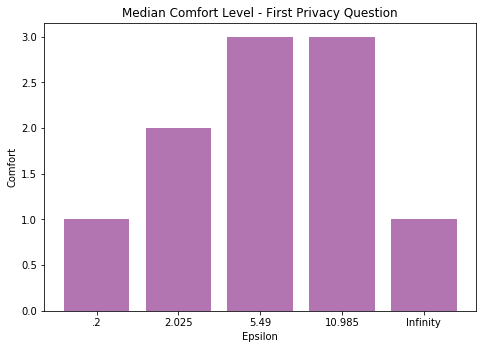

In [17]:
#median
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
value = [get_median(answ1_51), get_median(answ1_60),get_median(answ1_75), get_median(answ1_90), get_median(answ1_100)]
category = epsilons
ax.bar(category,value, color = (0.5,0.1,0.5,0.6))
plt.ylabel('Comfort')
plt.xlabel('Epsilon')
plt.title('Median Comfort Level - First Privacy Question')
plt.show()

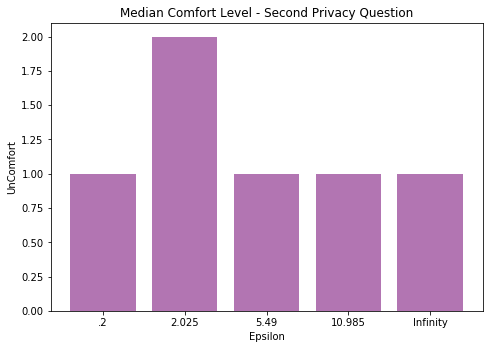

In [18]:
#median - answ 2
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
value = [get_median(answ2_51), get_median(answ2_60),get_median(answ2_75), get_median(answ2_90), get_median(answ2_100)]
category = epsilons
ax.bar(category,value, color = (0.5,0.1,0.5,0.6))
plt.ylabel('UnComfort')
plt.xlabel('Epsilon')
plt.title('Median Comfort Level - Second Privacy Question')
plt.show()

In [30]:
def get_mean(arr):
    total = arr[0] + arr[1] + arr[2]
    summ = arr[0] + 2*arr[1] + 3*arr[2]
    return summ/total

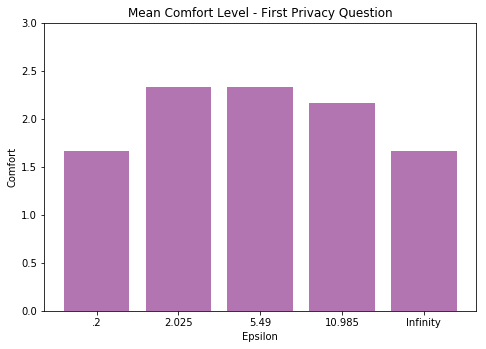

In [35]:
#mean
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
value = [get_mean(answ1_51), get_mean(answ1_60),get_mean(answ1_75), get_mean(answ1_90), get_mean(answ1_100)]
category = epsilons
ax.bar(category,value, color = (0.5,0.1,0.5,0.6))
plt.ylabel('Comfort')
plt.ylim([0,3])
plt.xlabel('Epsilon')
plt.title('Mean Comfort Level - First Privacy Question')
plt.show()

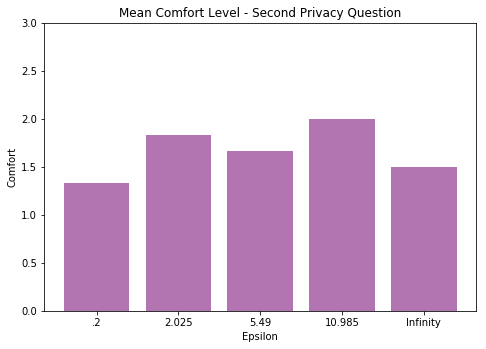

In [33]:
#mean
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
value = [get_mean(answ2_51), get_mean(answ2_60),get_mean(answ2_75), get_mean(answ2_90), get_mean(answ2_100)]
category = epsilons
ax.bar(category,value, color = (0.5,0.1,0.5,0.6))
plt.ylabel('Comfort')
plt.xlabel('Epsilon')
plt.ylim([0,3])
plt.title('Mean Comfort Level - Second Privacy Question')
plt.show()

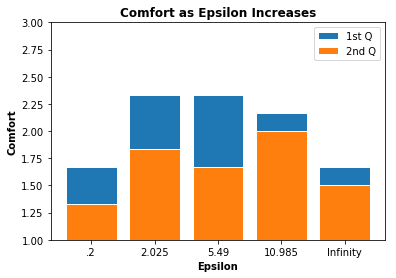

In [43]:
#combine the mean comfort levels for the first and second questions
value_1 = [get_mean(answ1_51), get_mean(answ1_60),get_mean(answ1_75), get_mean(answ1_90), get_mean(answ1_100)]
value_2 = [get_mean(answ2_51), get_mean(answ2_60),get_mean(answ2_75), get_mean(answ2_90), get_mean(answ2_100)]

plt.bar(epsilons, value_1, edgecolor='white', label='1st Q')
plt.bar(epsilons, value_2, edgecolor='white', label='2nd Q')
# Add xticks on the middle of the group bars
plt.xlabel('Epsilon', fontweight='bold')
plt.ylabel('Comfort', fontweight='bold')
plt.ylim([1,3])
plt.title('Comfort as Epsilon Increases', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars1))], epsilons)
# Create legend & Show graphic
plt.legend()
plt.show()
#comfort decreases from 1 to 2 which is whats supposed to happen. 
#general trend is also decresing which is supposed to happen
#Q2 answers are pretty weird since theres an increase at epsilon =11 which makes no sense. so idk there
#if we look at Q1, then epsilon=5.49 is the smallest one with comfort above 2.25

Text(0.5, 1.0, 'Median Comfort Level - First Privacy Question')

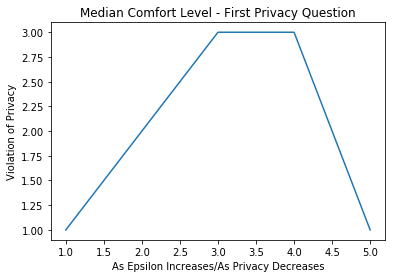

In [25]:
plt.plot([1, 2, 3, 4, 5], [get_median(answ1_51), get_median(answ1_60),get_median(answ1_75), get_median(answ1_90), get_median(answ1_100)])
plt.ylabel('Violation of Privacy')
plt.xlabel('As Epsilon Increases/As Privacy Decreases')
plt.title('Median Comfort Level - First Privacy Question')

Text(0.5, 1.0, 'Median Comfort Level - Second Privacy Question')

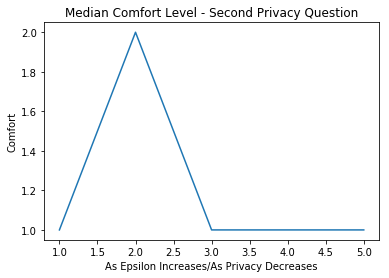

In [26]:
plt.plot([1, 2, 3, 4, 5], [get_median(answ2_51), get_median(answ2_60),get_median(answ2_75), get_median(answ2_90), get_median(answ2_100)])
plt.ylabel('Comfort')
plt.xlabel('As Epsilon Increases/As Privacy Decreases')
plt.title('Median Comfort Level - Second Privacy Question')

Text(0.5, 1.0, 'Mean Comfort Level - First Privacy Question')

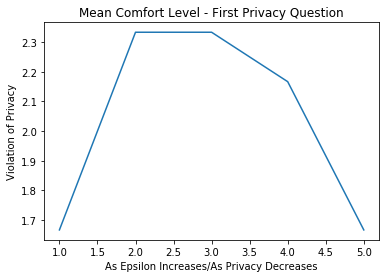

In [27]:
plt.plot([1, 2, 3, 4, 5], [get_mean(answ1_51), get_mean(answ1_60),get_mean(answ1_75), get_mean(answ1_90), get_mean(answ1_100)])
plt.ylabel('Violation of Privacy')
plt.xlabel('As Epsilon Increases/As Privacy Decreases')
plt.title('Mean Comfort Level - First Privacy Question')

Text(0.5, 1.0, 'Mean Comfort Level - Second Privacy Question')

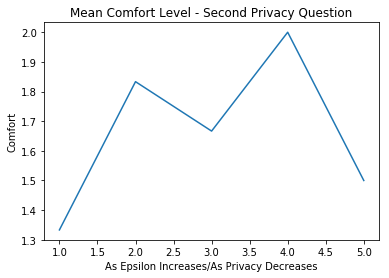

In [28]:
plt.plot([1, 2, 3, 4, 5], [get_mean(answ2_51), get_mean(answ2_60),get_mean(answ2_75), get_mean(answ2_90), get_mean(answ2_100)])
plt.ylabel('Comfort')
plt.xlabel('As Epsilon Increases/As Privacy Decreases')
plt.title('Mean Comfort Level - Second Privacy Question')

In [ ]:
#